<a href="https://colab.research.google.com/github/mburaksayici/FullNumPyCNN-NN-LogReg/blob/master/vestel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. İlk Bakış

Genellikle ilk olarak hızlı veri analizi için Pandas Profiler'ı kullanırım. PDF üzerinde kötü bir görüntüsü olacaktır, fakat görmenizi değerli bulduğum için  ayrı bir PDF'de ekliyorum. 

In [ ]:
import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
veri = pd.read_excel("birleşik_data_v11 (1).xlsx",skiprows=1)


In [ ]:
#profile = ProfileReport(veri, title='Pandas Profiling Report', minimal = True)
#profile.to_notebook_iframe()


Too many variables, especially on pmi, rc, cc,  es. 74 variables for 100 sample, too problematic to estimate.

Problemler:
Eksik veriler : pmi
Özellik(feature) fazlalığı = 73 : pmi, rc, cc,  es
Örneklem(Sample) kıtlığı = 100
Birbirine Bağımlı(Interdependent) özellikler


Satışları inceleyelim.

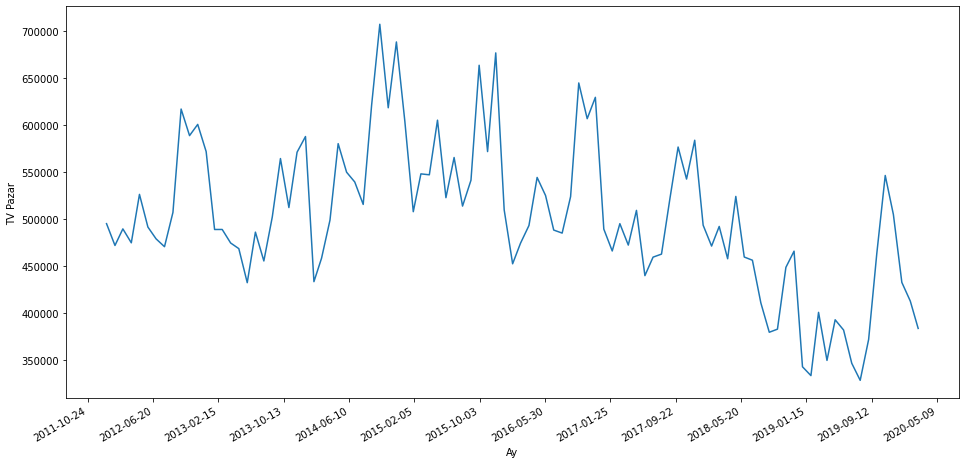

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
np.random.seed(1)
date = veri[["date"]].to_numpy()
N = 10
y = np.random.rand(N)
now = dt.datetime.now()
then = now + dt.timedelta(days=240 
                         )
days = mdates.drange(now,then,dt.timedelta(days=1))
plt.figure(figsize=(16,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=240))
plt.plot(date,veri[["TV_Pazar"]].to_numpy())
plt.ylabel("TV Pazar")
plt.xlabel("Ay")

plt.gcf().autofmt_xdate()
plt.show()

Sezonsallık mevcut, azalan trend de mevcut. Türkiye'de senelik 2.7 milyon televizyon satıldığı için bu verilerin ihracatı da dahil edebildiğini fark ediyorum. Fakat sezonsallık ve trend Türkiye'yi işaret etmekte. Verimiz de Bu yüzden buraya bir soru işareti koyuyorum. Öncelikle kayıp verileri tamamlayalım. 

# 2. Kayıp veriler, Veri Özeti

PMI endeksi, televizyon satışları için güzel bir gösterge olabilir. Fakat şu haliyle kullanacağımız tahmin mimarilerinin performanslarını düşürebilir. Bu feature'ları özet geçeceğiz.

Eğer bize verilen veriler ihracatı da kapsıyorsa, PMI, RC, ES değerlerini daha iyi represente etmek için, ve ülkelere ihracat tahmini değil de toplam satışları tahmin etmeye çalıştığımız için TV ihracat oranlarını bu değerlerle çarpmak, PMI,RC, ES verilerindeki değişimlerin ihracat sayılarını ne kadar etkilediğini gösteren bir parametre haline gelecektir. 



GTIP 8528.72  Televizyon; diğerleri, renkli olanlar kodu ile PMI,RC,ES değerleri verilen Almanya, İtalya, Fransa, Birleşik Krallık ülkelerine yapılan toplam ihracatın döviz cinsi değerleri alınabilir.

In [ ]:
%matplotlib inline
ihracatoranlari = pd.read_excel("TV İhracat 852872.xlsx")

In [ ]:
fransaihracatdolar = ihracatoranlari[["İhracat Dolar"]].loc[ihracatoranlari["Ulke adı"] == "Fransa"].reset_index(drop=True).rename(columns={"İhracat Dolar":"fransaihracatoran"})
ispanyaihracatdolar = ihracatoranlari[["İhracat Dolar"]].loc[ihracatoranlari["Ulke adı"] == "İspanya"].reset_index(drop=True).rename(columns={"İhracat Dolar":"ispantaihracatoran"})
italyaihracatdolar = ihracatoranlari[["İhracat Dolar"]].loc[ihracatoranlari["Ulke adı"] == "İtalya"].reset_index(drop=True).rename(columns={"İhracat Dolar":"italyaihracatoran"})
almanyaihracatdolar = ihracatoranlari[["İhracat Dolar"]].loc[ihracatoranlari["Ulke adı"] == "Almanya"].reset_index(drop=True).rename(columns={"İhracat Dolar":"almanyaihracatoran"})
bkrallıkihracatdolar = ihracatoranlari[["İhracat Dolar"]].loc[ihracatoranlari["Ulke adı"] == "Birleşik Krallık"].reset_index(drop=True).rename(columns={"İhracat Dolar":"bkrallıkihracatoran"})

İlk 1 ay ihracat oranları bu şekildedir. Birazdan, Her ayın ihracat oranlarını, karşılık gelen ülkelerin parametresiyle ağrılıklı toplamını alacağım.

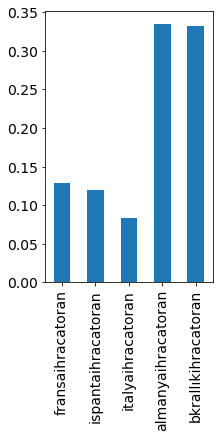

In [ ]:
ihracatoran = pd.concat([fransaihracatdolar,ispanyaihracatdolar,italyaihracatdolar,almanyaihracatdolar,bkrallıkihracatdolar],axis=1)
ihracatoran = ihracatoran.div(ihracatoran.sum(axis=1), axis=0)
ihracatoran.iloc[1].plot.bar(figsize=(3,5),fontsize=14 )

Şimdi ise, ülkelerin PMI'ını, ihracat oranlarıyla çarpacağız. Fakat bundan önce, PMI verilerindeki eksikleri gidermeliyiz. 2017 4. ay sonrası tüm ülkelerin PMI verileri bulunmakta. PMI verileri ve kalan tüm featurelar arasında bir lineer model arayıp doldurmaya çalışacağım. 
PMI endeksini tahmin etmek için gerekli olduğunu düşündüğüm featurelar CC,RC ve ES. 

Çin ve US PMI'ı için farklı şeyler düşünmeliyim. Fakat bu verileri tahmin etmek zor, ve belki de önemli bir gösterge değildir. Şimdilik siliyorum.

ERROR:root:Line magic function `%inline` not found.


Predicting  Germany_PMI with ES
Predicting  Germany_PMI with RC
Predicting  Germany_PMI with CC


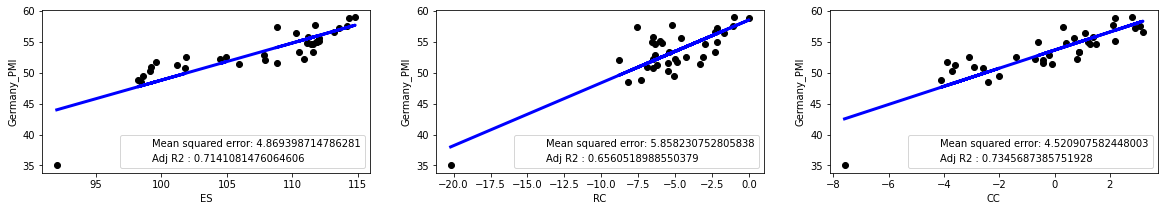

Predicting  France_PMI with ES
Predicting  France_PMI with RC
Predicting  France_PMI with CC


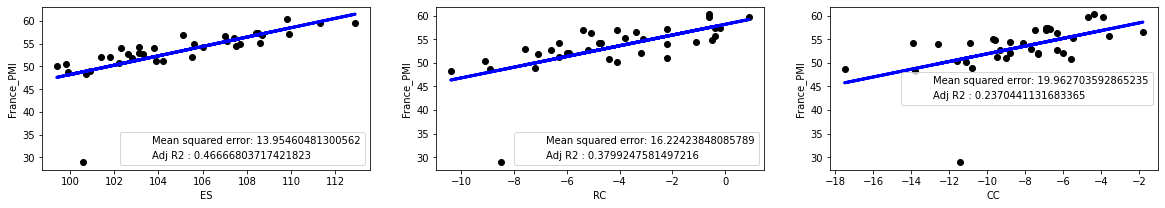

Predicting  Italy_PMI with ES
Predicting  Italy_PMI with RC
Predicting  Italy_PMI with CC


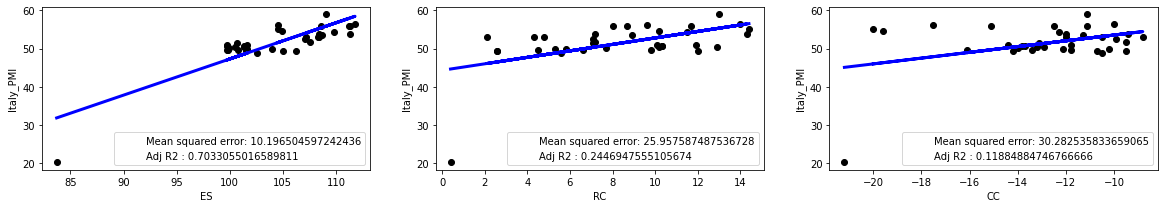

Predicting  UK_PMI with ES
Predicting  UK_PMI with RC
Predicting  UK_PMI with CC


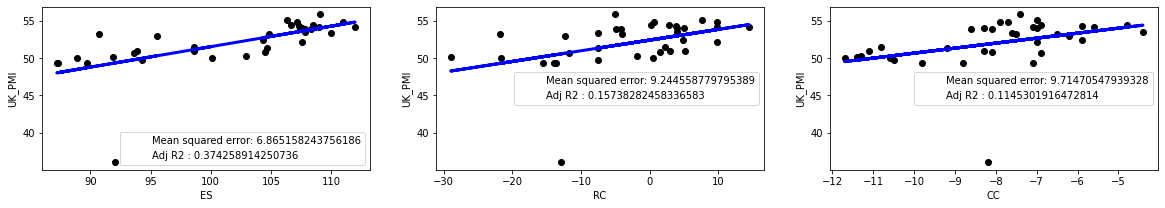

Predicting  Spain_PMI with ES
Predicting  Spain_PMI with RC
Predicting  Spain_PMI with CC


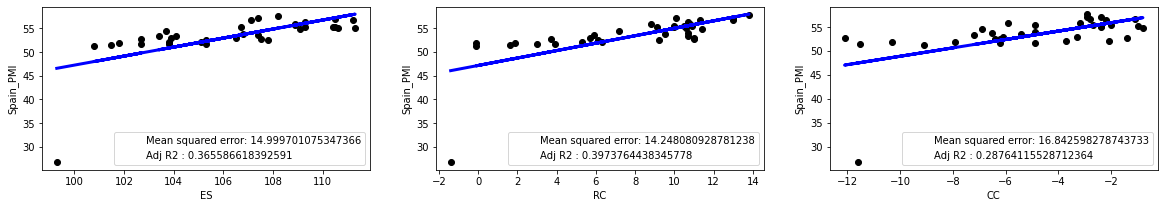

In [ ]:
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
from pylab import rcParams
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
%inline
ES = ["Germany_ES","France_ES",	"Italy_ES", "United Kingdom_ES",	"Spain_ES"]
RC = ["Germany_RC","France_RC",	"Italy_RC", "United Kingdom_RC",	"Spain_RC"]
CC = ["Germany_CC","France_CC",	"Italy_CC", "United Kingdom_CC",	"Spain_CC"]
PMI = ["Germany_PMI","France_PMI",	"Italy_PMI", "UK_PMI",	"Spain_PMI"]
predictors = [ES,RC,CC]
predictorsname = ["ES","RC","CC"]
for i in range(len(CC)):
  for j in range(len(predictors)):
    print("Predicting ",PMI[i],"with", predictorsname[j]  )
    pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
    countryanditspredictor = predictors[j][i]
    predictorval, pmival = pmiregression[[countryanditspredictor]], pmiregression[[PMI[i]]]
    regr = 0
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    #print(pmival)
    regr.fit(predictorval, pmival)
    # Make predictions using the testing set
    pmi_predict = regr.predict(predictorval)
    #print('Mean squared error: %.2f' % mean_squared_error(predictorval, pmi_predict))
    msetext = "Mean squared error: "+  str(mean_squared_error(pmival, pmi_predict))
    # The coefficient of determination: 1 is perfect prediction
   # print('Coefficient of determination: %.2f'% r2_score(pmival, pmi_predict))
    r_squared = r2_score(pmival, pmi_predict)
    adjusted_r_squared = 1 - (1-r_squared)*(len(pmival)-1)/(len(pmival)-predictorval.shape[1]-1)
    r2text = "Adj R2 : " + str(adjusted_r_squared)
    # Plot outputs
    plt.subplot(1, 3, j+1)
    plt.scatter(predictorval, pmival,  color='black')
    plt.xlabel(predictorsname[j])
    plt.ylabel(PMI[i])
    plt.plot([], [], ' ', label=msetext)
    plt.plot([], [], ' ', label=r2text)
    plt.legend()
    plt.plot(predictorval, pmi_predict, color='blue', linewidth=3,)
  plt.show()

 Almanya için CC ikna edici gözüküyor. İkili ilişkileri de deneyelim. Fakat test ettiğimizde göreceğiz ki ikili ilişkiler(multiple linear regression) çok mantıklı sonuçlar üretmemekte, aşağıda birazdan bir örneğini göstereceğim.

0 0
Predicting  Germany_PMI with ES  and  RC
0 0
Predicting  Germany_PMI with ES  and  CC


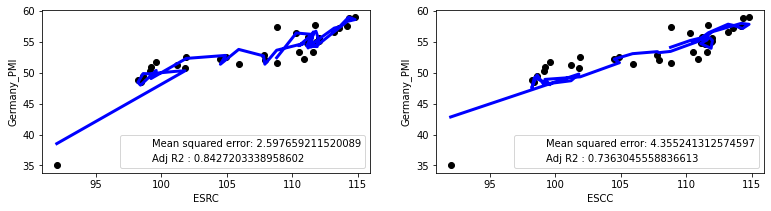

0 1
Predicting  Germany_PMI with RC  and  CC


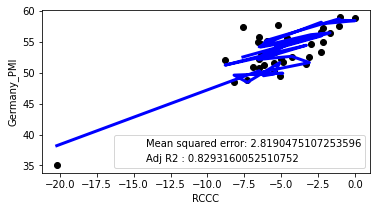

1 0
Predicting  France_PMI with ES  and  RC
1 0
Predicting  France_PMI with ES  and  CC


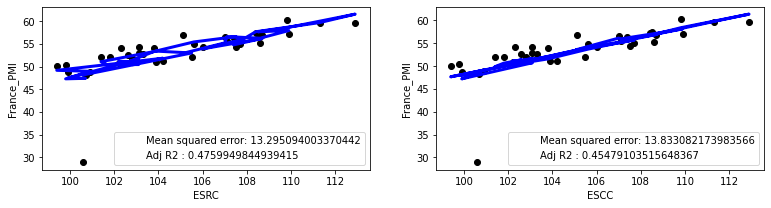

1 1
Predicting  France_PMI with RC  and  CC


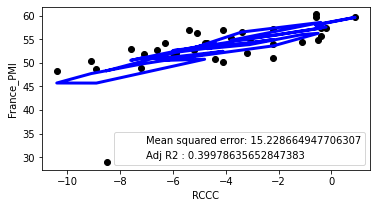

2 0
Predicting  Italy_PMI with ES  and  RC
2 0
Predicting  Italy_PMI with ES  and  CC


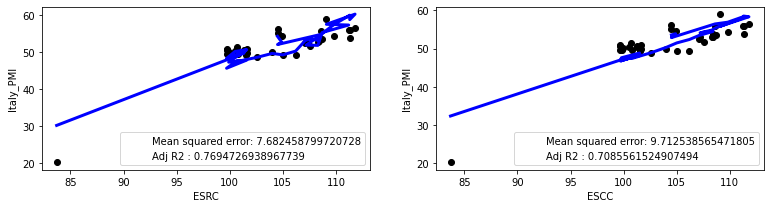

2 1
Predicting  Italy_PMI with RC  and  CC


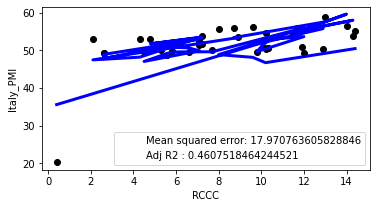

3 0
Predicting  UK_PMI with ES  and  RC
3 0
Predicting  UK_PMI with ES  and  CC


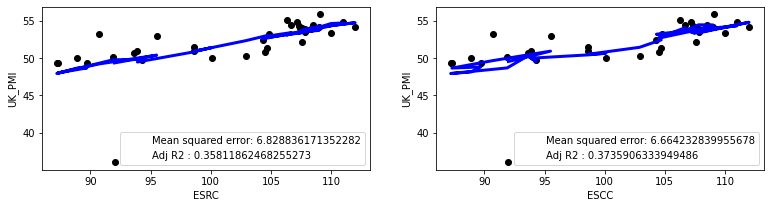

3 1
Predicting  UK_PMI with RC  and  CC


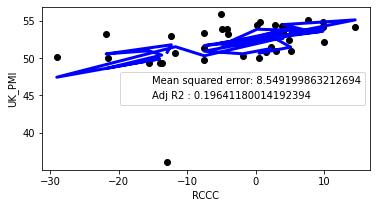

4 0
Predicting  Spain_PMI with ES  and  RC
4 0
Predicting  Spain_PMI with ES  and  CC


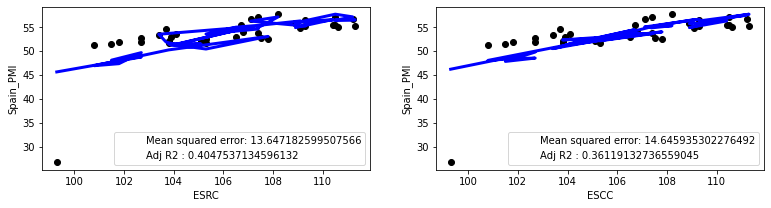

4 1
Predicting  Spain_PMI with RC  and  CC


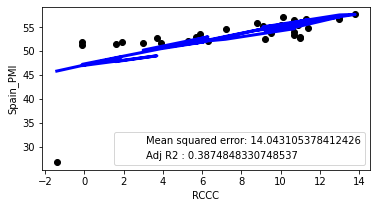

In [ ]:
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.pyplot import figure
from pylab import rcParams
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
ES = ["Germany_ES","France_ES",	"Italy_ES", "United Kingdom_ES",	"Spain_ES"]
RC = ["Germany_RC","France_RC",	"Italy_RC", "United Kingdom_RC",	"Spain_RC"]
CC = ["Germany_CC","France_CC",	"Italy_CC", "United Kingdom_CC",	"Spain_CC"]
PMI = ["Germany_PMI","France_PMI",	"Italy_PMI", "UK_PMI",	"Spain_PMI"]
predictors = [ES,RC,CC]
predictorsname = ["ES","RC","CC"]
for i in range(len(CC)):
  for j in range(len(predictors)):
    for k in range(j+1,len(predictors)):
      if j == k: 
        continue
      else:
        print(i,j)
        print("Predicting ",PMI[i],"with",predictorsname[j], " and ", predictorsname[k] )


        pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()

        countryanditspredictor1 = predictors[j][i]
        countryanditspredictor2 = predictors[k][i]
        predictorval, pmival = pmiregression[[countryanditspredictor1,countryanditspredictor2]], pmiregression[[PMI[i]]]

        regr = 0
        regr = linear_model.LinearRegression()

        # Train the model using the training sets
        #print(pmival)
        regr.fit(predictorval, pmival)

        # Make predictions using the testing set
        pmi_predict = regr.predict(predictorval)


        #print('Mean squared error: %.2f' % mean_squared_error(predictorval, pmi_predict))
        msetext = "Mean squared error: "+  str(mean_squared_error(pmival, pmi_predict))
        # The coefficient of determination: 1 is perfect prediction
      # print('Coefficient of determination: %.2f'% r2_score(pmival, pmi_predict))
        r_squared = r2_score(pmival, pmi_predict)
        adjusted_r_squared = 1 - (1-r_squared)*(len(pmival)-1)/(len(pmival)-predictorval.shape[1]-1)

        r2text = "Adj R2 : " + str(adjusted_r_squared)
        # Plot outputs
        plt.subplot(1, 3, k)
        
        plt.scatter(predictorval[[countryanditspredictor1]], pmival,  color='black')
        xlabeltext = predictorsname[j]+ predictorsname[k]
        plt.xlabel(xlabeltext)
        plt.ylabel(PMI[i])
        plt.plot([], [], ' ', label=msetext)
        plt.plot([], [], ' ', label=r2text)
        plt.legend()
        plt.plot(predictorval[[countryanditspredictor1]], pmi_predict, color='blue', linewidth=3,)
    plt.show()

  

Üstteki grafikler, 2 parametre ile PMI tahmini yapmakta. Fakat, tek bir parametreyi x ekseni olarak almakta, biraz garip gözükmesinin sebebi budur. Kıyaslamam, R2'ler üstünedir. En iyi özellikler aşağıdaki gibidir:


Almanya PMI için: ES ve  RC

France PMI için: ES

İtalya PMI için: ES ve  RC

UK PMI için: ES

Spain PMI için: ES

Fakat 2'li ilişkiler çok fazla yardımcı olmayacak.

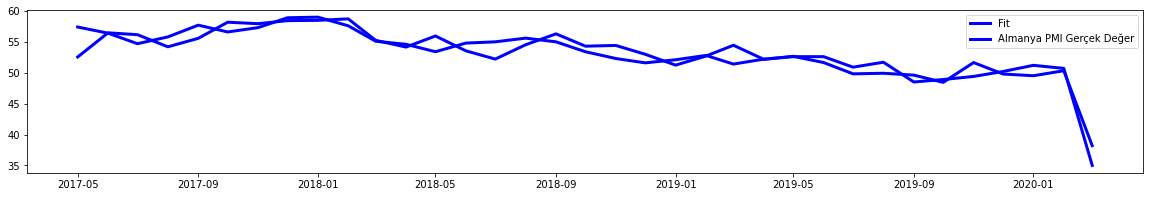

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "Germany_CC"
countryanditspredictor2 =  "Germany_RC"
predictorval, pmival = pmiregression[[countryanditspredictor1,countryanditspredictor2]], pmiregression[["Germany_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
pmi_predict = regr.predict(predictorval)
plt.plot(pmiregression[["date"]] ,pmi_predict, color='blue', linewidth=3,label="Fit")
plt.plot(pmiregression[["date"]] ,pmiregression[["Germany_PMI"]], color='blue', linewidth=3,label="Almanya PMI Gerçek Değer")
plt.legend()
plt.show()


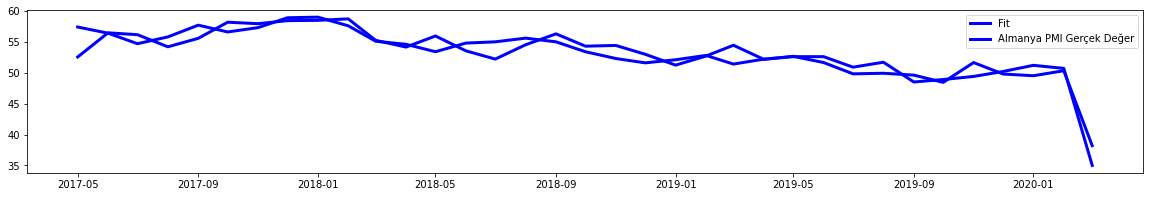

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "Germany_CC"
countryanditspredictor2 =  "Germany_RC"
predictorval, pmival = pmiregression[[countryanditspredictor1,countryanditspredictor2]], pmiregression[["Germany_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
pmi_predict = regr.predict(predictorval)
plt.plot(pmiregression[["date"]] ,pmi_predict, color='blue', linewidth=3,label="Fit")
plt.plot(pmiregression[["date"]] ,pmiregression[["Germany_PMI"]], color='blue', linewidth=3,label="Almanya PMI Gerçek Değer")
plt.legend()
plt.show()


Gerçek PMI verileriyle kıyasladım. Almanya PMI için model, CC,RC yi alıyor. R2'u yukarıda yüksek idi.

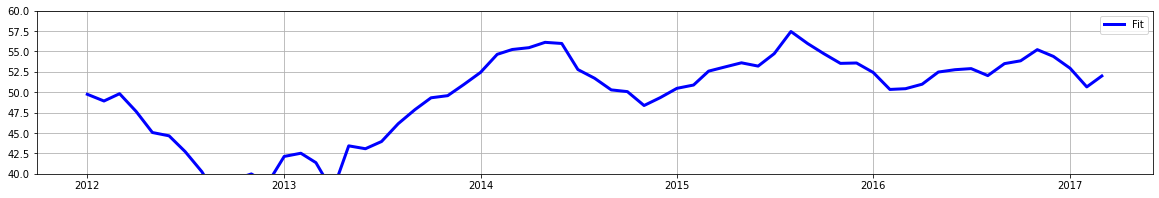

In [ ]:
pmiregression = veri[veri['date'] < '2017-04-01'].copy()
countryanditspredictor1 = "Germany_CC"
countryanditspredictor2 =  "Germany_RC"
predictorval, pmival = pmiregression[[countryanditspredictor1,countryanditspredictor2]], pmiregression[["Germany_PMI"]]  
pmi_predict = regr.predict(predictorval)
plt.plot(pmiregression[["date"]] ,pmi_predict, color='blue', linewidth=3,label="Fit")
plt.ylim(40,60)
plt.grid()
#plt.plot(pmiregression[["date"]] ,pmiregression[["Germany_PMI"]], color='blue', linewidth=3,label="Almanya PMI Gerçek Değer")
plt.legend()
plt.show()

En son Germany CC de karar kıldım. 2010-2020 PMI Almanya'yla kıyasladım ve az çok uydu.
![image.png](attachment:image.png)

Fakat Almanya için ikili tahmin modelinde gerçek PMI ile kıyaslarsak, PMI tahmini için tek özellik kullanmak mantıklı duruyor.:
![image-2.png](attachment:image-2.png)

France PMI için: ES

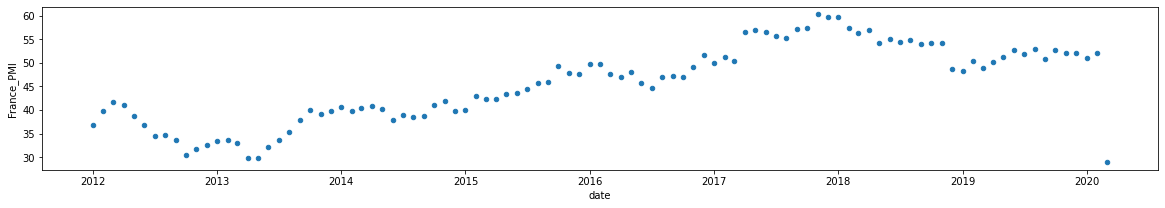

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "France_ES"

predictorval, pmival = pmiregression[[countryanditspredictor1]], pmiregression[["France_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
gpmi = pd.isna(tamamlanmisveri["France_PMI"])
gpmi.loc[99] = False
maskedgpmi = tamamlanmisveri[gpmi]
predictorvalgerman = maskedgpmi[["France_ES"]]
pmi_predict = regr.predict(predictorvalgerman)
tamamlanmisveri.loc[gpmi,"France_PMI"] = pmi_predict
tamamlanmisveri.plot(kind='scatter', x="date", y='France_PMI')


İtalya PMI için: ES

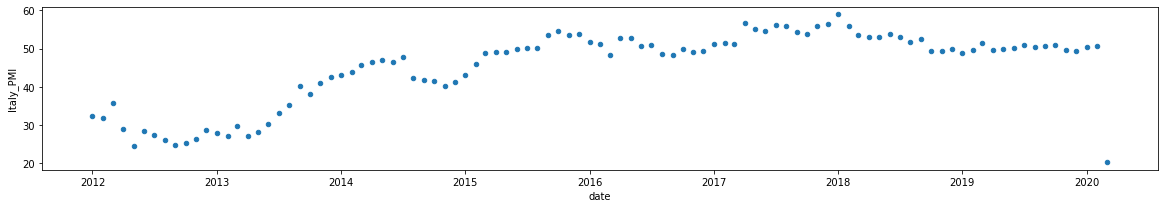

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "Italy_ES"
predictorval, pmival = pmiregression[[countryanditspredictor1]], pmiregression[["Italy_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
gpmi = pd.isna(tamamlanmisveri["Italy_PMI"])
gpmi.loc[99] = False
maskedgpmi = tamamlanmisveri[gpmi]
predictorvalgerman = maskedgpmi[[countryanditspredictor1]]
pmi_predict = regr.predict(predictorvalgerman)
tamamlanmisveri.loc[gpmi,"Italy_PMI"] = pmi_predict
tamamlanmisveri.plot(kind='scatter', x="date", y='Italy_PMI')


UK PMI için: ES

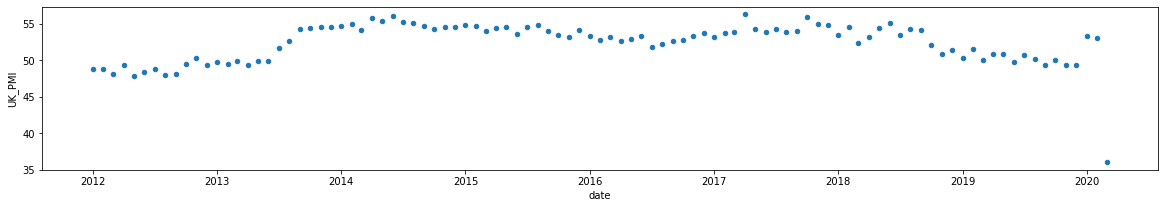

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "United Kingdom_ES"
predictorval, pmival = pmiregression[[countryanditspredictor1]], pmiregression[["UK_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
gpmi = pd.isna(tamamlanmisveri["UK_PMI"])
gpmi.loc[99] = False
maskedgpmi = tamamlanmisveri[gpmi]
predictorvalgerman = maskedgpmi[[countryanditspredictor1]]
pmi_predict = regr.predict(predictorvalgerman)
tamamlanmisveri.loc[gpmi,"UK_PMI"] = pmi_predict
tamamlanmisveri.plot(kind='scatter', x="date", y='UK_PMI')


Spain PMI için ES

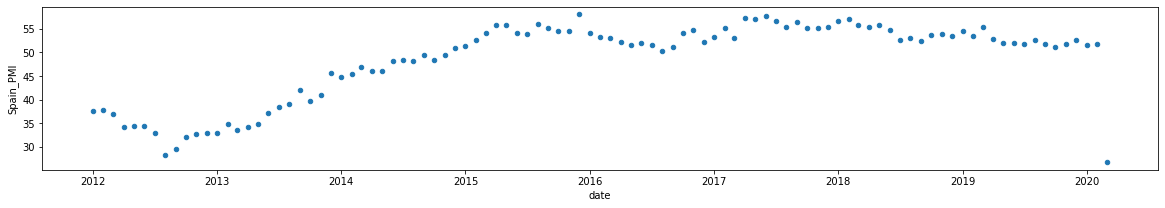

In [ ]:
tamamlanmisveri = veri.copy()
pmiregression = veri[(veri['date'] > '2017-04-01') & (veri['date'] <= '2020-03-01')].copy()
countryanditspredictor1 = "Spain_ES"
predictorval, pmival = pmiregression[[countryanditspredictor1]], pmiregression[["Spain_PMI"]]
regr = linear_model.LinearRegression()
regr.fit(predictorval, pmival)
nonnanfeatures = tamamlanmisveri[tamamlanmisveri.columns[~tamamlanmisveri.isnull().any()]].copy()
gpmi = pd.isna(tamamlanmisveri["Spain_PMI"])
gpmi.loc[99] = False
maskedgpmi = tamamlanmisveri[gpmi]
predictorvalgerman = maskedgpmi[[countryanditspredictor1]]
pmi_predict = regr.predict(predictorvalgerman)
tamamlanmisveri.loc[gpmi,"Spain_PMI"] = pmi_predict
tamamlanmisveri.plot(kind='scatter', x="date", y='Spain_PMI')

PMI Verilerimizi doldurduk. Sıra, bu özelliklerin ne kadar önemli olduğunda.

# 3. Veri Üretimi/Seçimi

Çok özellik var. Azaltmak, azaltırken de önemli bir feature kaybediyorsak, azaltarak yeni feature'ı kazanmak ve üretmek lazım. Makine öğrenmesinde hem lineer cebir(denklemden fazla değişkenli lineer sistem çözülemez), hem de pratikte(fazla özellik eklemek R^2'u gerçek performansı arttırmasa bile arttırır, etc.) overfit sorunu olarak fazla feature güzel bir durum değil. Fakat az olmasından çok daha iyidir.

Özellik seçiminin birden fazla yolu var. Teker teker tüm feature'lar ile TV_Pazar'a regresyon kurup p value almak, f_test, model kurup sürekli yeni featurelar ekleyip sonuç artıp azalttığını görmek, gibi. Bu yöntemlerin kısıtları ve problemleri vardır, faydalıdırlar, fakat dikkat edilmesi gereken noktalar vardır.

"A common approach that is not recommended is to plot the forecast variable against a particular predictor and if there is no noticeable relationship, drop that predictor from the model. This is invalid because it is not always possible to see the relationship from a scatterplot, especially when the effects of other predictors have not been accounted for.

Another common approach which is also invalid is to do a multiple linear regression on all the predictors and disregard all variables whose  
p-values are greater than 0.05. To start with, statistical significance does not always indicate predictive value. Even if forecasting is not the goal, this is not a good strategy because the  
p -values can be misleading when two or more predictors are correlated with each other (see Section 5.9)." Kaynak = https://otexts.com/fpp2/selecting-predictors.html

Ben f_test ile seçim kuracağım.

Started
Finished


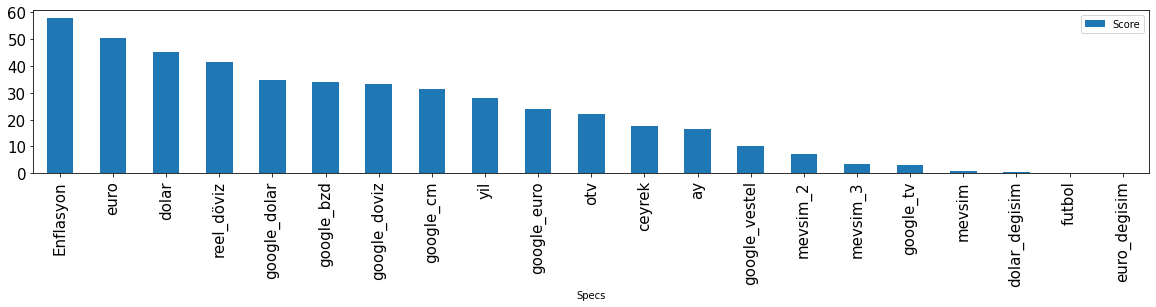

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
import sklearn
from sklearn.feature_selection import f_regression
featureselectiondf = tamamlanmisveri.copy()
featureselectiondf.drop(columns=['date', 'TV_Pazar',"id",],inplace=True)

nonnanfeatures = featureselectiondf[featureselectiondf.columns[~featureselectiondf.isnull().any()]].copy()
nonnanfeatures.drop(nonnanfeatures.tail(1).index,inplace=True)
normalized_df=(nonnanfeatures-nonnanfeatures.min())/(nonnanfeatures.max()-nonnanfeatures.min())
X = normalized_df #independent columns
tmmverigcc = tamamlanmisveri.drop(tamamlanmisveri.tail(1).index).copy()  #target column i.e price range
y = tmmverigcc[["TV_Pazar"]] 

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k="all")
print("Started")
fit = bestfeatures.fit(X,y.to_numpy().ravel())
print("Finished")
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(60,'Score').set_index("Specs").plot.bar(fontsize=15)

PMI,RC,ES,CC verilerini ihracat oranlarıyla çarpıp toplamda sadece PMI,RC,ES,CC olacak şekilde 4 özelliğe indirgeyelim. Böylelikle, 20 özelliği 4 özelliğe indirmiş olacağız.
ihracatoran'ı bu yüzden hesaplamıştık.

In [ ]:
ihracatoran.drop(ihracatoran.tail(4).index,inplace=True) 
ihracatoran
ihracatorannp = ihracatoran.to_numpy()#*tamamlanmisveri[["France_PMI","Spain_PMI","Italy_PMI","Germany_PMI","UK_PMI"]]
ES = ["Germany_ES","France_ES",	"Italy_ES", "United Kingdom_ES","Spain_ES"]
RC = ["Germany_RC","France_RC",	"Italy_RC", "United Kingdom_RC","Spain_RC"]
CC = ["Germany_CC","France_CC",	"Italy_CC", "United Kingdom_CC","Spain_CC"]
PMI = ["Germany_PMI","France_PMI",	"Italy_PMI", "UK_PMI",	"Spain_PMI"]
pmieurope = np.sum(tamamlanmisveri[["France_PMI","Spain_PMI","Italy_PMI","Germany_PMI","UK_PMI"]].to_numpy()*ihracatorannp,axis=1)
eseurope = np.sum(tamamlanmisveri[["France_ES","Spain_ES","Italy_ES","Germany_ES","United Kingdom_ES"]].to_numpy()*ihracatorannp,axis=1)
rseurope = np.sum(tamamlanmisveri[["France_RC","Spain_RC","Italy_RC","Germany_RC","United Kingdom_RC"]].to_numpy()*ihracatorannp,axis=1)
cceurope = np.sum(tamamlanmisveri[["France_CC","Spain_CC","Italy_CC","Germany_CC","United Kingdom_CC"]].to_numpy()*ihracatorannp,axis=1)
tamamlanmisveri.drop(columns=ES+RC+CC+PMI,  axis=1, inplace=True)
tamamlanmisveri['PMIEurope']=pd.Series(pmieurope)
tamamlanmisveri['ESEurope']=pd.Series(eseurope)
tamamlanmisveri['CCEurope']=pd.Series(cceurope)
tamamlanmisveri['RCEurope']=pd.Series(rseurope)
tamamlanmisveri.drop(columns= ["pmi","China_PMI","US_PMI","European Union_ES","Euro area_ES","European Union_RC","Euro area_RC","European Union_CC","Euro area_CC"], inplace=True)
#tamamlanmisveri.insert(-1, "PMIEurope", True) 

Çok fazla ekonomik gösterge var. Özellikle ithalat+ihracat söz konusu ise,  yurtdışı göstergeler çok fazla değil. Fazla özellik, eğer bir farklılık ifade etmiyorsa:
Ekstra veri toplama maliyetine
Tahmin modelinde yalancı iyi göstergelere
Yorumlanma zorluğuna yol açacaktır.


Aylık satış rakamları Türkiye için fazla geldiği için, problemde açıkça belirtilmediği için ithalat+ihracat rakamları diye yorumlamıştım. Fakat, yurtdışı verilerinin önemi çok düşük, ve pazar satışlarıyla en alakalı özellikler Türkiye için toplanmış istatistiklerdir. 

Bu istatistikler ise birbirinden bağımsız değildir. Enflasyon, maddi_durum, euro, dolar, tuketici_fiyat_dusunce,Turkey_ES, reel_döviz  ekonomik göstergelerdir, her bir özellik kendi içinde birkaç özellik bulundurmaktadır. Feature sayısını azaltırken, hemen hemen aynı bilgiyi represente eden özellikleri atacağım. 




In [ ]:
np.shape(tamamlanmisveri)

(99, 49)

Veri sayısını 49'a düşürdük. Yeni feature'lar nasıl katkı yapacak görmek için tekrardan özellikleri sıralayalım.


Started
Finished


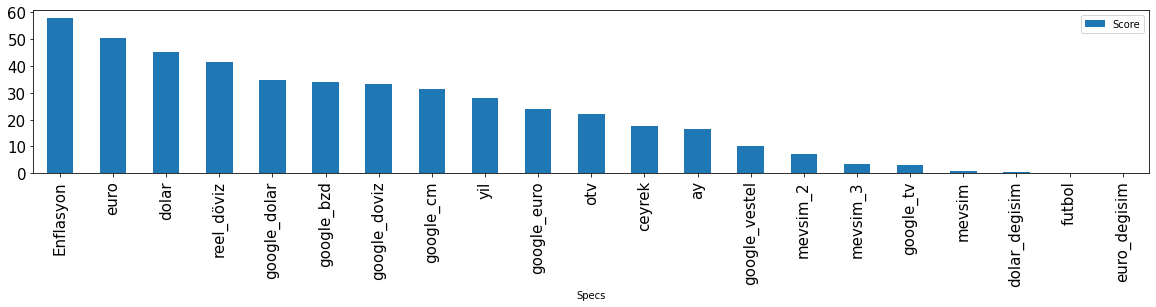

In [ ]:
featureselectiondf = tamamlanmisveri.copy()
featureselectiondf.drop(columns=['date', 'TV_Pazar',"id",],inplace=True)

nonnanfeatures = featureselectiondf[featureselectiondf.columns[~featureselectiondf.isnull().any()]].copy()
nonnanfeatures.drop(nonnanfeatures.tail(1).index,inplace=True)
normalized_df=(nonnanfeatures-nonnanfeatures.min())/(nonnanfeatures.max()-nonnanfeatures.min())
X = normalized_df #independent columns
tmmverigcc = tamamlanmisveri.drop(tamamlanmisveri.tail(1).index).copy()  #target column i.e price range
y = tmmverigcc[["TV_Pazar"]] 

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k="all")
print("Started")
fit = bestfeatures.fit(X,y.to_numpy().ravel())
print("Finished")
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
  #print 10 best features
featureScores.nlargest(43,'Score').set_index("Specs").plot.bar(fontsize=15)

Bunları ileride bir daha özellik seçiminde kullanacağız.
# 4. Model Seçimi
t zamandaki özelliklerle t zamandaki satışları tahminlemek için XGBoost kullanacağım.
Bu yöntemle, t+1 zamanının özellikleri yoksa, t+1 satışlarını tahminleyemeyiz.
t+1 zamanındaki özellikleri ise ARIMA ile tahmin edeceğim.

ceyrek	mevsim	mevsim_2	mevsim_3	yil bunlardan sadece ay'ı alacağım. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from time import time
import os
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from pandas import DataFrame

Verileri bu aşamada seçip, atmak istediğimiz özellikleri burada atabiliriz.

In [ ]:
verifit = tamamlanmisveri.sort_values(['date'],ascending = False).copy()
test = verifit[:12].copy()
train = verifit[12:].copy()
test.drop(["date","id","ceyrek","mevsim",	"mevsim_2","mevsim_3","yil", 'google_bzd', 'google_cm', 'google_dolar', 'google_euro', 'google_doviz', 'issiz_beklenti', 'secim', 'euro_degisim','dolar_degisim', 'euro_degisim','otomobil_alma','PMIEurope', 'ESEurope', 'CCEurope', 'RCEurope'],axis=1,inplace=True)
train.drop(["date","id","ceyrek","mevsim",	"mevsim_2","mevsim_3","yil" ,'google_bzd', 'google_cm', 'google_dolar', 'google_euro', 'google_doviz', 'issiz_beklenti', 'secim', 'euro_degisim','dolar_degisim', 'euro_degisim','otomobil_alma','PMIEurope', 'ESEurope', 'CCEurope', 'RCEurope'],axis=1,inplace=True)

In [ ]:
testx = test.loc[:, test.columns != 'TV_Pazar'].copy()
testy = test.loc[:, test.columns == 'TV_Pazar'].copy()
trainx = train.loc[:, train.columns != 'TV_Pazar'].copy()
trainy = train.loc[:, train.columns == 'TV_Pazar'].copy()

In [ ]:
def rmspe(preds, dtrain):
    labels = dtrain.get_label()
    labels = np.reshape(labels,(-1,1))
    return 'RMSPE', np.sqrt(np.average([(1 - yh/y) ** 2 for (yh, y) in zip(preds, labels) if y != 0]))


def rmspe_xg(yhat, y):
    #print("ylable:",y.get_label())
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)


In [ ]:
dtrain = xgb.DMatrix(trainx, trainy)
dvalid = xgb.DMatrix(testx, testy)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]


2012-2019 eğitim, 2019-2020 test


Burada, uzatmamak adına tekrar tekrar özellikleri çıkartmayacağım, ilk model, tüm veriyi kullanmakta, sonrasında parça parça önemsiz özellikleri çıkarttım. RMSPE iyi olduğunda, özellikleri not aldım. Burada tek tek bu prosesi göstermedim, fakat aşağıdaki kod bloğu bunu yapmakta.

In [ ]:
params = {"objective": "reg:squarederror", #since it is a regression problem
          "booster" : "gbtree",     #tree
          "eta": 0.03,#0.03 TÜ              #learning rate   to reduce overfitting issues
          "max_depth":14,          #depth of the tree
          "subsample": 0.9,         #subsample the data prior to growing trees - overcomes overfitting
          "colsample_bytree": 0.7,  #subsampling of columns for each tree
          "silent": 1,              #verbosity
          "seed": 10                
          }
num_boost_round = 6111          #countinue for 6000 itertions - 60 BİN YAPTM
print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=30, feval=rmspe, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))

testx.sort_index(inplace=True) 
testy.sort_index(inplace=True) 

yhat = gbm.predict(xgb.DMatrix(testx)).reshape(-1,1)

#error = rmspe(testx,yhat)
#print("ERROR:",error)
#print('RMSPE: {:.6f}'.format(error))


Train a XGBoost model
[16:46:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:505023.03125	eval-rmse:nan	train-RMSPE:0.96984	eval-RMSPE:nan
Multiple eval metrics have been passed: 'eval-RMSPE' will be used for early stopping.

Will train until eval-RMSPE hasn't improved in 30 rounds.
[1]	train-rmse:490294.09375	eval-rmse:nan	train-RMSPE:0.94038	eval-RMSPE:nan
[2]	train-rmse:476043.34375	eval-rmse:nan	train-RMSPE:0.91236	eval-RMSPE:nan
[3]	train-rmse:462277.62500	eval-rmse:nan	train-RMSPE:0.88528	eval-RMSPE:nan
[4]	train-rmse:448787.15625	eval-rmse:nan	train-RMSPE:0.85829	eval-RMSPE:nan
[5]	train-rmse:435714.00000	eval-rmse:nan	train-RMSPE:0.83256	eval-RMSPE:nan
[6]	train-rmse:

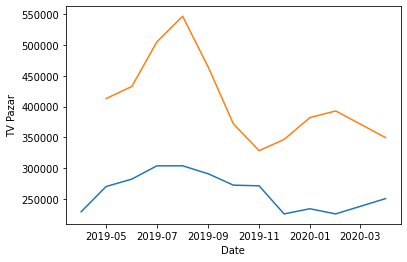

Index(['ay', 'google_tv', 'google_vestel', 'Enflasyon', 'güven_endeksi', 'otv',
       'futbol', 'euro', 'dolar', 'perakende_endeks_elektrikli',
       'perakende_endeks_elektrikli_mev_tak', 'day_tuk_egilim', 'eko_durum',
       'eko_durum_beklenti', 'mali_durum', 'maddi_durum_beklenti',
       'maddi_durum', 'daya_tuk_uygunluk', 'tasarruf_uygunluk',
       'tuketici_fiyat_beklenti', 'tuketici_fiyat_dusunce', 'guven_endeks',
       'Turkey_CC', 'Turkey_RC', 'Turkey_ES', 'gercek_yp_mevduat',
       'reel_döviz'],
      dtype='object')

In [ ]:
plt.plot(verifit[:12][["date"]],yhat,label="Prediction")
plt.plot(verifit[:12][["date"]],testy,label="TV Pazar")
plt.xlabel("Date")
plt.ylabel("TV Pazar")
plt.show()
testx.columns

35 feature'a ARIMA uygulamayı, 35 feature'un 2021 sonuna kadar değerlerini hesaplayıp  da deneyeceğim. Fakat, XGBoost modelini olabildiğince küçültürsem, bunu da feature importance'lardaki ilk 5 veriyi alarak yaparsam, daha stabil bir modele erişebilirim.

5 feature'lu XGBoost yapalım. Kullandığım özellikler:
"Enflasyon","maddi_durum","euro","dolar","tuketici_fiyat_dusunce",'ay','TV_Pazar'

Önem sırasındaki ilk 5 özellik.

In [ ]:

verifit = tamamlanmisveri.sort_values(['date'],ascending = False).copy()
test5 = verifit[:12].copy()
train5 = verifit[12:].copy()


test5 = test5[["Enflasyon","maddi_durum","euro","dolar","tuketici_fiyat_dusunce",'ay','TV_Pazar']]
train5 = train5[["Enflasyon","maddi_durum","euro","dolar","tuketici_fiyat_dusunce",'ay' ,'TV_Pazar']]


test5x = test5.loc[:, test5.columns != 'TV_Pazar'].copy()
test5y = test5.loc[:, test5.columns == 'TV_Pazar'].copy()

train5x = train5.loc[:, train5.columns != 'TV_Pazar'].copy()
train5y = train5.loc[:, train5.columns == 'TV_Pazar'].copy()



In [ ]:
dtrain = xgb.DMatrix(train5x, train5y)
dvalid = xgb.DMatrix(test5x, test5y)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

params = {"objective": "reg:squarederror", #since it is a regression problem
          "booster" : "gbtree",     #tree
          "eta": 0.03,#0.03 TÜ              #learning rate   to reduce overfitting issues
          "max_depth":14,          #depth of the tree
          "subsample": 0.9,         #subsample the data prior to growing trees - overcomes overfitting
          "colsample_bytree": 0.7,  #subsampling of columns for each tree
          "silent": 1,              #verbosity
          "seed": 10                
          }
num_boost_round = 6111          #countinue for 6000 itertions - 60 BİN YAPTM


print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=30, feval=rmspe, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))


print("validating")
test5x.sort_index(inplace=True) 
test5y.sort_index(inplace=True) 
print(test5x.shape)
yhat = gbm.predict(xgb.DMatrix(test5x)).reshape(-1,1)

#error = rmspe(testx,yhat)
#print("ERROR:",error)
#print('RMSPE: {:.6f}'.format(error))


Train a XGBoost model
[16:53:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:505023.03125	eval-rmse:399419.62500	train-RMSPE:0.96984	eval-RMSPE:0.96200
Multiple eval metrics have been passed: 'eval-RMSPE' will be used for early stopping.

Will train until eval-RMSPE hasn't improved in 30 rounds.
[1]	train-rmse:490294.09375	eval-rmse:384729.34375	train-RMSPE:0.94038	eval-RMSPE:0.92488
[2]	train-rmse:476064.78125	eval-rmse:370543.03125	train-RMSPE:0.91192	eval-RMSPE:0.88904
[3]	train-rmse:462303.34375	eval-rmse:357220.50000	train-RMSPE:0.88485	eval-RMSPE:0.85574
[4]	train-rmse:448813.93750	eval-rmse:343784.31250	train-RMSPE:0.85787	eval-RMSPE:0.82178
[5]	train-rmse:435743.28125

[86]	train-rmse:51443.92969	eval-rmse:50183.69141	train-RMSPE:0.08911	eval-RMSPE:0.11099
[87]	train-rmse:50266.84375	eval-rmse:49885.57422	train-RMSPE:0.08703	eval-RMSPE:0.11032
[88]	train-rmse:49200.51172	eval-rmse:49102.26953	train-RMSPE:0.08512	eval-RMSPE:0.10907
[89]	train-rmse:48120.45312	eval-rmse:48692.75391	train-RMSPE:0.08322	eval-RMSPE:0.10847
[90]	train-rmse:47059.06641	eval-rmse:48372.65625	train-RMSPE:0.08135	eval-RMSPE:0.10813
[91]	train-rmse:46010.77344	eval-rmse:48194.98438	train-RMSPE:0.07946	eval-RMSPE:0.10800
[92]	train-rmse:45019.27734	eval-rmse:48034.86719	train-RMSPE:0.07770	eval-RMSPE:0.10772
[93]	train-rmse:44028.53906	eval-rmse:47949.06250	train-RMSPE:0.07594	eval-RMSPE:0.10780
[94]	train-rmse:43019.32812	eval-rmse:47668.00781	train-RMSPE:0.07415	eval-RMSPE:0.10745
[95]	train-rmse:42085.74219	eval-rmse:47194.98438	train-RMSPE:0.07251	eval-RMSPE:0.10667
[96]	train-rmse:41191.29688	eval-rmse:47124.35547	train-RMSPE:0.07093	eval-RMSPE:0.10668
[97]	train-rmse:40293

2019-2020 için tahmin : 

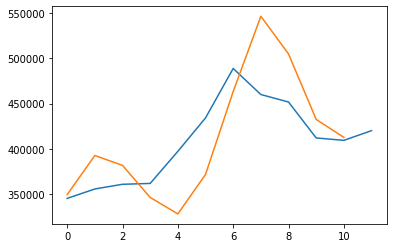

In [ ]:
plt.plot(np.arange(len(yhat)),yhat)
plt.plot(np.arange(len(testy)),testy)
plt.show()

Ay verisi zaten var. Diğer 5 parametreyi ARIMA ile 2021 sonuna kadar çekeceğim. 2021 yılı sonuna kadar, her feature'a ayrı ayrı ARIMA yapıp 2021 sonuna kadarki değerlerini tahmin edeceğim. 




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=322.181, BIC=334.453, Fit time=0.509 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=387.799, BIC=392.708, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=346.829, BIC=356.646, Fit time=0.298 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=323.860, BIC=333.677, Fit time=0.532 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=307.619, BIC=322.345, Fit time=0.965 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=338.185, BIC=350.457, Fit time=0.702 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=304.656, BIC=321.837, Fit time=2.726 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=303.809, BIC=318.535, Fit time=2.655 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=317.185, BIC=329.457, Fit time=1.458 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(1, 

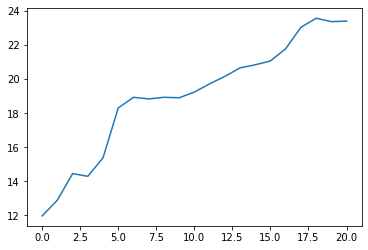

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=387.565, BIC=399.837, Fit time=0.389 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=418.679, BIC=423.588, Fit time=0.022 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=397.844, BIC=407.661, Fit time=0.127 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=386.528, BIC=396.346, Fit time=0.563 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=388.479, BIC=400.750, Fit time=0.493 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=418.431, BIC=425.794, Fit time=0.069 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=388.475, BIC=400.747, Fit time=0.749 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=390.523, BIC=405.249, Fit time=0.983 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=389.731, BIC=397.094, Fit time=0.134 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 

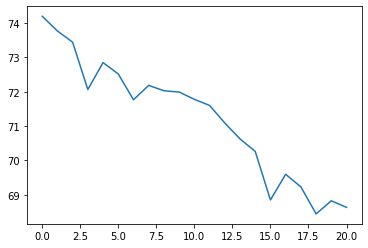

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-25.679, BIC=-13.407, Fit time=0.692 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=40.437, BIC=45.346, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-2.708, BIC=7.110, Fit time=0.233 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-27.556, BIC=-17.739, Fit time=0.833 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-28.716, BIC=-16.444, Fit time=0.767 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-14.889, BIC=-5.072, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-24.630, BIC=-9.904, Fit time=1.969 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=19.371, BIC=26.734, Fit time=0.065 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=-31.773, BIC=-14.593, Fit time=1.906 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12)

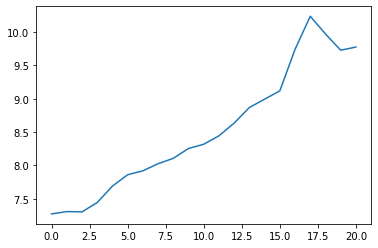

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-55.029, BIC=-42.757, Fit time=0.989 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=17.121, BIC=22.030, Fit time=0.038 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-29.051, BIC=-19.234, Fit time=0.275 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-56.970, BIC=-47.152, Fit time=0.309 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-58.555, BIC=-46.283, Fit time=1.264 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=-43.898, BIC=-34.080, Fit time=0.316 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-53.679, BIC=-38.953, Fit time=2.695 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-8.938, BIC=-1.575, Fit time=0.067 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=-60.206, BIC=-43.025, Fit time=1.916 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2

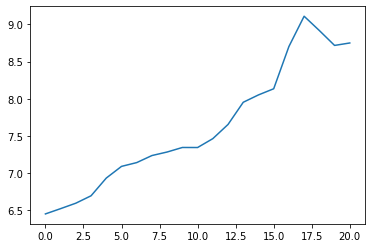

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=390.613, BIC=402.885, Fit time=0.558 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=418.680, BIC=423.589, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=404.693, BIC=414.511, Fit time=0.123 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=391.278, BIC=401.095, Fit time=0.525 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=391.978, BIC=406.704, Fit time=0.748 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=419.904, BIC=429.721, Fit time=0.104 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=391.652, BIC=406.378, Fit time=1.098 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=394.138, BIC=411.318, Fit time=1.766 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=383.542, BIC=398.268, Fit time=0.630 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 

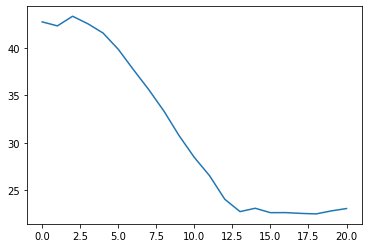

,Enflasyon,maddi_durum,euro,dolar,tuketici_fiyat_dusunce,ay
0,11.971332,74.197099,7.272013,6.451262,42.790399,4
1,12.895734,73.769118,7.307017,6.522325,42.366370,5
2,14.450540,73.441179,7.302422,6.595647,43.387351,6
3,14.291311,72.063199,7.442698,6.695259,42.593111,7
4,15.379221,72.846534,7.688746,6.933551,41.611869,8
5,18.298402,72.516096,7.859323,7.090508,39.889242,9
6,18.922669,71.764395,7.918409,7.141545,37.724429,10
7,18.826519,72.182682,8.025076,7.236390,35.627905,11
8,18.922489,72.027267,8.105567,7.283869,33.347834,12
9,18.893280,71.989036,8.253839,7.344804,30.742413,0


In [ ]:

predictdict = {}
featurelist = ['Enflasyon', 'maddi_durum', 'euro', 'dolar', 'tuketici_fiyat_dusunce']
for feature in featurelist:
    tamamlanmisveri = veri.copy()
    tamamlanmisveri.drop(tamamlanmisveri.tail(1).index,inplace=True) 
    tümveriarima = tamamlanmisveri[["date",feature]]

    tümveriarima.reset_index(inplace=True)
    tümveriarima['date'] = pd.to_datetime(tümveriarima['date'])
    tümveriarima = tümveriarima.set_index('date').drop("index",axis=1)


   
    from statsmodels.tsa.seasonal import seasonal_decompose
    result = seasonal_decompose(trainarima, model="multiplicative")

    from pyramid.arima import auto_arima
    stepwise_model = auto_arima(tümveriarima, start_p=1, start_q=1,
                               max_p=12, max_q=12, m=12,
                               start_P=0, seasonal=True,
                               d=1, D=1, trace=True,
                               error_action='ignore',  
                               suppress_warnings=True, 
                               stepwise=True)
    #print(stepwise_model.aic())

    stepwise_model.fit(tümveriarima)
    future_forecast = stepwise_model.predict(n_periods=21)
    plt.plot(future_forecast)
    plt.show()
    predictdict[feature] = future_forecast
predictdict["ay"] = [4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12]
predictdf = pd.DataFrame.from_dict(predictdict)

    

ARIMA tahminlerini görelim.

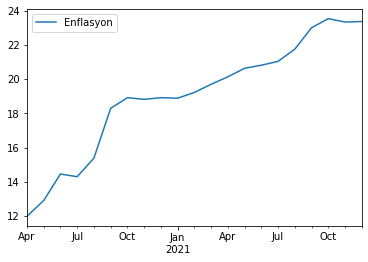

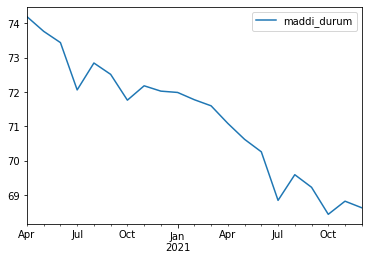

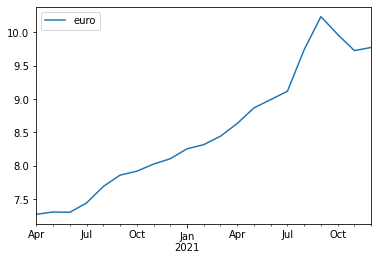

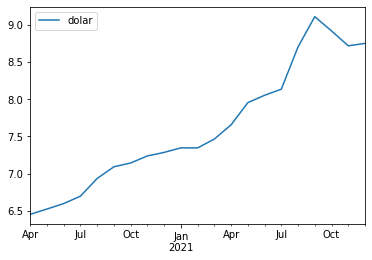

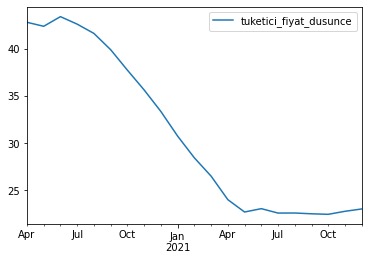

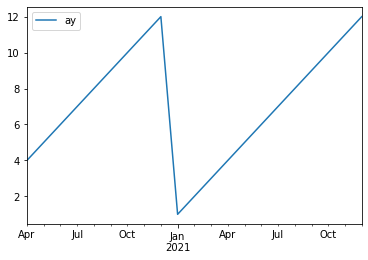

In [ ]:
date20202021 = pd.date_range(start='4/1/2020', end='12/1/2021', freq='MS')    
for columns in predictdf:    
    pd.DataFrame(predictdf[columns]).set_index(date20202021).plot()
    plt.show()

Şimdi XGBoost'u tüm datada çalıştırıp, ardından kalanı tahmin edelim. Test kısmından da yararlanmak istiyorum, 2019-2020 arasını da veriye dahil etmem lazım. Fakat bu sefer test verisi olmayacağı için, overfit'e sebep olabilirim. 5 özellikli ve 2019-2020 arası modelle test ettiğimiz modelin,  train error'u aynı olacak şekilde ayarlarsam overfit'den kaçınmış olurum.

Bunun için max. iteration sayısını ilk modelle aynı tutuyorum.

In [ ]:

verifit = tamamlanmisveri.sort_values(['date'],ascending = False).copy()
verifit = verifit[["Enflasyon","maddi_durum","euro","dolar","tuketici_fiyat_dusunce",'ay','TV_Pazar']]
verifitx = verifit.loc[:, verifit.columns != 'TV_Pazar'].copy()
verifity = verifit.loc[:, verifit.columns == 'TV_Pazar'].copy()

dtrain = xgb.DMatrix(verifitx, verifity)
dvalid = xgb.DMatrix(verifitx, verifity)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

params = {"objective": "reg:squarederror", #since it is a regression problem
          "booster" : "gbtree",     #tree
          "eta": 0.03,#0.03 TÜ              #learning rate   to reduce overfitting issues
          "max_depth":14,          #depth of the tree
          "subsample": 0.9,         #subsample the data prior to growing trees - overcomes overfitting
          "colsample_bytree": 0.7,  #subsampling of columns for each tree
          "silent": 1,              #verbosity
          "seed": 10                
          }
num_boost_round = 135          #countinue for 6000 itertions - 60 BİN YAPTM


print("Train a XGBoost model")
start = time()
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, 
  early_stopping_rounds=30, feval=rmspe, verbose_eval=True)
end = time()
print('Training time is {:2f} s.'.format(end-start))
print("validating")
verifitx.sort_index(inplace=True) 
verifity.sort_index(inplace=True) 
print(verifitx.shape)
yhat = gbm.predict(xgb.DMatrix(predictdf)).reshape(-1,1)

Train a XGBoost model
[17:09:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:493664.09375	eval-rmse:493664.09375	train-RMSPE:0.97011	eval-RMSPE:0.97011
Multiple eval metrics have been passed: 'eval-RMSPE' will be used for early stopping.

Will train until eval-RMSPE hasn't improved in 30 rounds.
[1]	train-rmse:479313.09375	eval-rmse:479313.09375	train-RMSPE:0.94113	eval-RMSPE:0.94113
[2]	train-rmse:465509.21875	eval-rmse:465509.21875	train-RMSPE:0.91323	eval-RMSPE:0.91323
[3]	train-rmse:452085.81250	eval-rmse:452085.81250	train-RMSPE:0.88615	eval-RMSPE:0.88615
[4]	train-rmse:439102.06250	eval-rmse:439102.06250	train-RMSPE:0.85990	eval-RMSPE:0.85990
[5]	train-rmse:426416.40625

[85]	train-rmse:51937.60938	eval-rmse:51937.60938	train-RMSPE:0.09165	eval-RMSPE:0.09165
[86]	train-rmse:50802.88672	eval-rmse:50802.88672	train-RMSPE:0.08955	eval-RMSPE:0.08955
[87]	train-rmse:49714.52734	eval-rmse:49714.52734	train-RMSPE:0.08758	eval-RMSPE:0.08758
[88]	train-rmse:48629.92969	eval-rmse:48629.92969	train-RMSPE:0.08560	eval-RMSPE:0.08560
[89]	train-rmse:47574.62109	eval-rmse:47574.62109	train-RMSPE:0.08370	eval-RMSPE:0.08370
[90]	train-rmse:46482.81641	eval-rmse:46482.81641	train-RMSPE:0.08173	eval-RMSPE:0.08173
[91]	train-rmse:45482.74609	eval-rmse:45482.74609	train-RMSPE:0.07994	eval-RMSPE:0.07994
[92]	train-rmse:44450.96875	eval-rmse:44450.96875	train-RMSPE:0.07807	eval-RMSPE:0.07807
[93]	train-rmse:43467.03516	eval-rmse:43467.03516	train-RMSPE:0.07630	eval-RMSPE:0.07630
[94]	train-rmse:42531.83594	eval-rmse:42531.83594	train-RMSPE:0.07455	eval-RMSPE:0.07455
[95]	train-rmse:41587.48438	eval-rmse:41587.48438	train-RMSPE:0.07287	eval-RMSPE:0.07287
[96]	train-rmse:40653

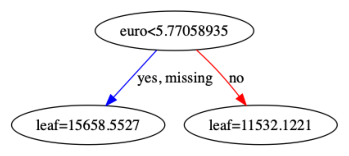

Tree plot etme işini denemem lazım, daha iyi olabilir.


In [ ]:
#fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_tree(gbm)
plt.show()
print("Tree plot etme işini denemem lazım, daha iyi olabilir.")

2020 4. ay - 2021 sonu tahmini:


In [ ]:

yhat = gbm.predict(xgb.DMatrix(predictdf)).reshape(-1,1)
#plt.plot(np.arange(len(yhat)),yhat)

verifit = tamamlanmisveri.sort_values(['date'],ascending = True).copy()
#test5 = verifit[:12].copy()
#train5 = verifit[12:].copy()


verifit = verifit[["date","Enflasyon","maddi_durum","euro","dolar","tuketici_fiyat_dusunce",'ay','TV_Pazar']]
alreadyhave = verifit[["date","TV_Pazar"]].copy()

pred = {"date" : date20202021,"TV_Pazar":yhat.reshape(21,)}
print("yhat0",np.shape(date20202021))
predpart = pd.DataFrame.from_dict(pred)

yhat0 (21,)


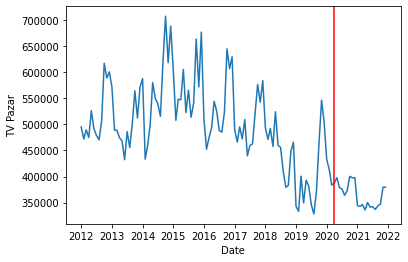

In [ ]:

alreadyhave = alreadyhave.append(predpart)
plt.plot(alreadyhave[["date"]],alreadyhave[["TV_Pazar"]])
plt.xlabel("Date")
plt.axvline(x=pd.Timestamp("2020-04-01"), color='r', linestyle='-')
plt.ylabel("TV Pazar")
plt.show()